# Lecture 5.1 Cryptography

This notebook is not as expansive as some of the previous ones. The goal here is to explore some code and understand what it's doing in the context of what you read.

We'll be doing some in class work along with this notebook.

In [1]:
## LIBRARIES - run this cell before any other code cells

import matplotlib.pyplot as plt
import pandas as pd


## Caesar Cipher

Below is a small program to encrypt or decrypt a message using the Caesar Cipher. We'll walk through this together in class. As we walk through it, you may want to add comments.

In [6]:
# Create a header for the code block
header_string = '''
CAESAR CIPHER
'''
print(header_string)

# list of symbols you can encrypt/decrypt
SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

while True:
    print('Do you want to (e)ncrypt or (d)ecrypt?')
    # making the input lowercase letters
    # response is a variable
    response = input('> ').lower()
    # checking if response starts with e or starts with d
    if response.startswith('e'):
        mode = 'encrypt'
        break
    elif response.startswith('d'):
        mode = 'decrypt'
        break

    print('Please enter the letter e or d.')

while True:
    # maxKey is 25; 26-1 because if you went 26 steps you would be back at the beginning
    maxKey = len(SYMBOLS) - 1
    print(f'Please enter the key (0 to {maxKey}) to use.')
    # making the input uppercase letters
    response = input('> ').upper() # not sure why .upper() is used if you want a number
    if not response.isdecimal():
        continue
    # need to make it an int(response) to get a string output
    if 0 <= int(response) < len(SYMBOLS):
        key = int(response)
        break

print('Enter the message to {}.'.format(mode))
message = input('> ')
# making the message uppercase, because the list of symbols was given in uppercase
message = message.upper()

translated = ''

# for is looking at every item in the string
for symbol in message:

    if symbol in SYMBOLS:
        # finding where the letter is in the list of symbols
        num = SYMBOLS.find(symbol)
        # shifting by the shift value, making the secret shifted value
        if mode == 'encrypt':
            num = num + key
        # taking away the shift, back to regular/the start
        elif mode == 'decrypt':
            num = num - key

        # Handle the wrap-around, starts at a again once you reach the end
        if num >= len(SYMBOLS):
            num = num - len(SYMBOLS)
        elif num < 0:
            num = num + len(SYMBOLS)

        # Add encrypted/decrypted number's symbol to translated:
        translated = translated + SYMBOLS[num]
    else:
        # Just add the symbol without encrypting/decrypting:
        translated = translated + symbol

print('> ',translated)


Do you want to (e)ncrypt or (d)ecrypt?
> d
Please enter the key (0 to 25) to use.
> 5
Enter the message to decrypt.
> YTIFD NX RTSIFD
>  TODAY IS MONDAY


In [18]:
# Create a header for the code block
header_string = '''
-------------
CAESAR CIPHER
-------------
'''
# this can print something x amount of times instead of writing it that many times:
# don't know how to make * bigger, need to Google that
{20*'-='}
print(header_string)


-------------
CAESAR CIPHER
-------------



### 🔍 Exploring the Code

1. Try typing in some messages and encrypting/decrypting them.
2. What does `message.upper()` do in the code above do?
> Changes the letter to uppercase
3. What happens if you change `int(response)` to just response on line 22?
> You won't get a string for the output

### 🦾 Try it Yourself

We're going to Make some edits to this code.

1. Walk through the code, add in some comments to explain what is happening at major steps.
2. Change any `print` statements for which you see the use of `format` so that they use `f`strings instead.
3. Add a fancy header to the code that gives a title or opening to the code (Do a Google search for ASCII art)

## Brute Force Attack - Caesar Cipher

The following code performs a brute force attack for a Caesar (or simple shift) cipher. It goes through each possible key that could be used and prints the result. This is simple, as the code does not recognize when the message has been decoded.

In [9]:
message = "YTIFD NX RTSIFD" # test message

# Every possible symbol that can be encrypted/decrypted:
# (This must match the SYMBOLS used when encrypting the message.)
SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

for key in range(len(SYMBOLS)):  # Loop through every possible key.

    translated = ''

    # Decrypt each symbol in the message:
    for symbol in message:

        if symbol in SYMBOLS:

            num = SYMBOLS.find(symbol)  # Get the number of the symbol.
            num = num - key  # Decrypt the number.

            # Handle the wrap-around if num is less than 0:
            if num < 0:
                num = num + len(SYMBOLS)

            # Add decrypted number's symbol to translated:
            translated = translated + SYMBOLS[num]

        else:
            # Just add the symbol without decrypting:
            translated = translated + symbol

    # Display the key being tested, along with its decrypted text:
    print(f'Key #{key}: {translated}')

Key #0: YTIFD NX RTSIFD
Key #1: XSHEC MW QSRHEC
Key #2: WRGDB LV PRQGDB
Key #3: VQFCA KU OQPFCA
Key #4: UPEBZ JT NPOEBZ
Key #5: TODAY IS MONDAY
Key #6: SNCZX HR LNMCZX
Key #7: RMBYW GQ KMLBYW
Key #8: QLAXV FP JLKAXV
Key #9: PKZWU EO IKJZWU
Key #10: OJYVT DN HJIYVT
Key #11: NIXUS CM GIHXUS
Key #12: MHWTR BL FHGWTR
Key #13: LGVSQ AK EGFVSQ
Key #14: KFURP ZJ DFEURP
Key #15: JETQO YI CEDTQO
Key #16: IDSPN XH BDCSPN
Key #17: HCROM WG ACBROM
Key #18: GBQNL VF ZBAQNL
Key #19: FAPMK UE YAZPMK
Key #20: EZOLJ TD XZYOLJ
Key #21: DYNKI SC WYXNKI
Key #22: CXMJH RB VXWMJH
Key #23: BWLIG QA UWVLIG
Key #24: AVKHF PZ TVUKHF
Key #25: ZUJGE OY SUTJGE


### 🔍 Exploring the Code

Write responses to the following questions:

1. What error message do you get if you comment `translated = ''`. Why do you need this line?

2. What happens if you change `translated = translated + SYMBOLS[num]` to `translated = translated + symbol`

3. What happens if you enter an unencrypted message into the Caesar cipher brute force algorithm?

### 🦾 Try it Yourself
Turn the above code into a function that asks the user for the message to decrypt.

Think about which pieces you need as input and how you will prompt the user

In [ ]:
## Turn the above code into a function that asks the user for the message to decrypt




## Frequency Analysis

Don't worry about the code in this next section. The main thing we'll be focusing on is looking at the bar graphs the code generates. You'll be learning how to do these types of things yourself in the next major section we hit in this course.

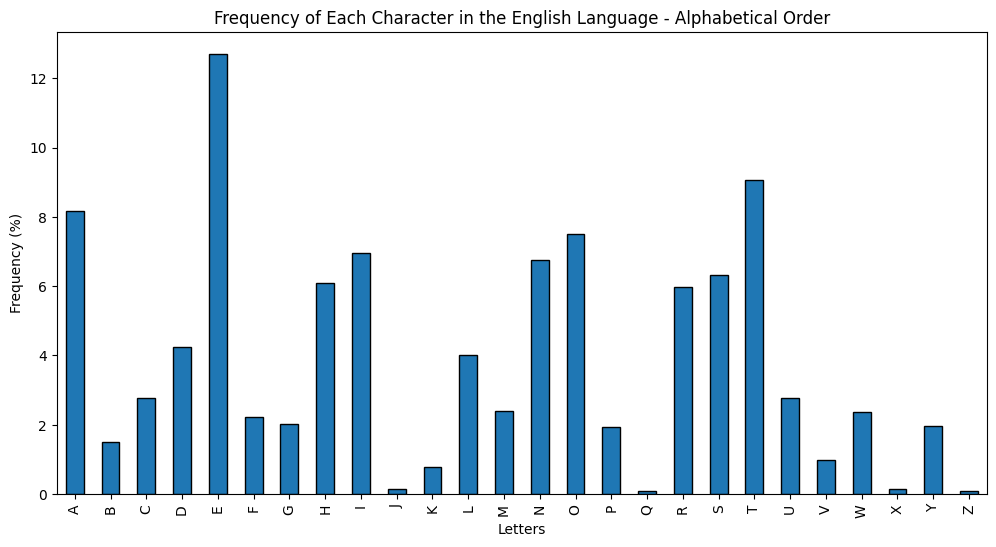

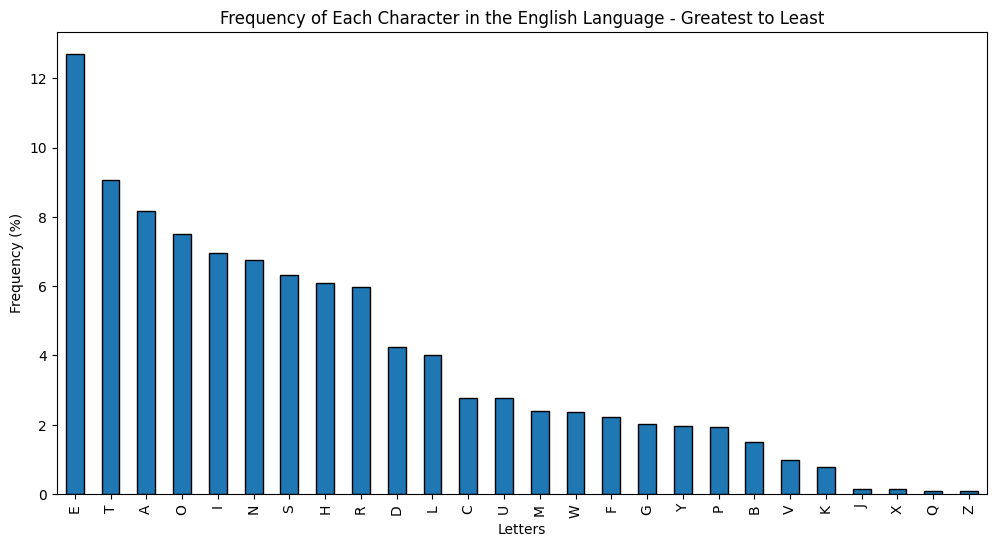

In [8]:
# We'll be covering how to create plots and use pandas in the next section
# this is only here for demonstration purposes

# Define the letters and their frequencies
letters = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
frequencies = [
    8.167, 1.492, 2.782, 4.253, 12.702, 2.228, 2.015, 6.094, 6.966,
    0.153, 0.772, 4.025, 2.406, 6.749, 7.507, 1.929, 0.095, 5.987,
    6.327, 9.056, 2.758, 0.978, 2.360, 0.150, 1.974, 0.074
]

### ALPHABETICAL ORDER
char_freq = pd.DataFrame({'letter': letters, 'frequency': frequencies})
# make bar plot in alphabetical order
char_freq.plot(kind='bar', x='letter', y='frequency', legend=False, figsize=(12, 6), edgecolor='black')

# Labeling the axes and adding a title
plt.xlabel('Letters')
plt.ylabel('Frequency (%)')
plt.title('Frequency of Each Character in the English Language - Alphabetical Order')
# Display the plot
plt.show()

### SORTED
# create sorted dataframe based on frequency
char_freq_sorted = char_freq.sort_values(by='frequency', ascending=False)
# make bar plot ordered by frequency
char_freq_sorted.plot(kind='bar', x='letter', y='frequency', legend=False, figsize=(12, 6), edgecolor='black')
# Labeling the axes and adding a title
plt.xlabel('Letters')
plt.ylabel('Frequency (%)')
plt.title('Frequency of Each Character in the English Language - Greatest to Least')
# Display the plot
plt.show()

### Example Using Frequency Analsysis

{'d': 4, 'o': 13, 'l': 38, 'u': 17, 'w': 11, 'v': 24, 's': 7, 'k': 8, 'a': 25, 'z': 28, 'j': 16, 'y': 20, 'f': 10, 't': 9, 'b': 8, 'p': 20, 'h': 14, 'n': 9, 'c': 3, 'x': 1, 'i': 3, 'm': 2}


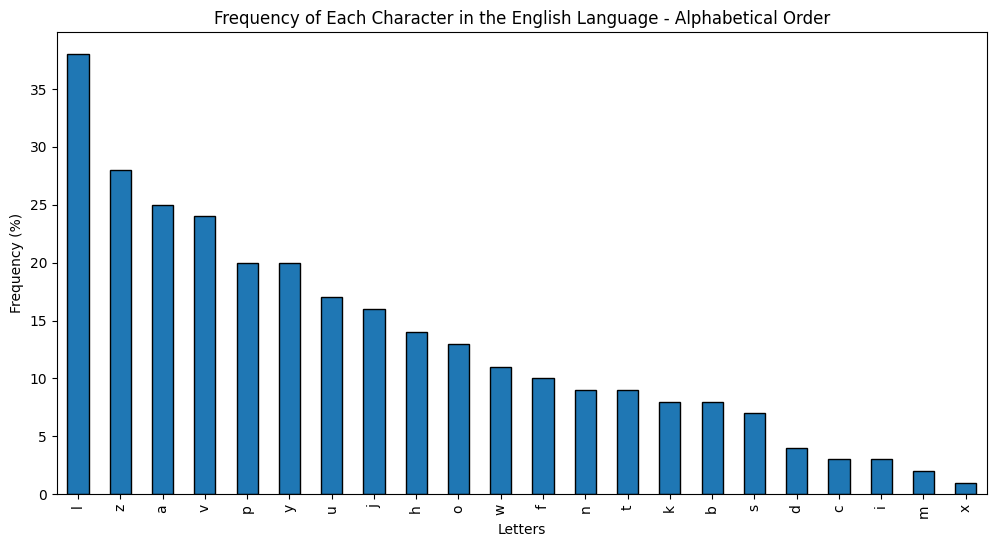

In [7]:
## original message
msg = '''
When people need to secretly store or communicate messages, they turn to cryptography.
Cryptography involves using techniques to obscure a message so outsiders cannot read the message.
It is typically split into two steps: encryption, in which the message is obscured, and decryption,
in which the original message is recovered from the obscured form.
'''
## decrypted message
encrypted_msg = '''DOLU WLVWSL ULLK AV ZLJYLASF ZAVYL VY JVTTBUPJHAL TLZZHNLZ, AOLF ABYU AV JYFWAVNYHWOF. JYFWAVNYHWOF PUCVSCLZ BZPUN ALJOUPXBLZ AV VIZJBYL H TLZZHNL ZV VBAZPKLYZ JHUUVA YLHK AOL TLZZHNL. PA PZ AFWPJHSSF ZWSPA PUAV ADV ZALWZ: LUJYFWAPVU, PU DOPJO AOL TLZZHNL PZ VIZJBYLK, HUK KLJYFWAPVU, PU DOPJO AOL VYPNPUHS TLZZHNL PZ YLJVCLYLK MYVT AOL VIZJBYLK MVYT.'''


symbols = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"
freq = {}


encrypted_msg = encrypted_msg.lower() # makes string all lowercase

# find frequency of characters in a message
for c in encrypted_msg:
    # doesn't do anything for punctuation or spaces
    if c.isspace() or c in symbols:
        continue
    elif c in freq:
        freq[c] += 1
    else:
        freq[c] = 1
print(freq)

# msg_car_freq = pd.DataFrame({'letter': letters, 'frequency': frequencies})
keys = list(freq.keys())
values = list(freq.values())

msg_char_freq = pd.DataFrame({'letter' : keys, 'frequency' : values})
# plt.bar(keys, values, color='skyblue', edgecolor='black')
# make bar plot in alphabetical order
sorted_msg_char_freq = msg_char_freq.sort_values(by='frequency', ascending=False)
sorted_msg_char_freq.plot(kind='bar', x='letter', y='frequency', legend=False, figsize=(12, 6), edgecolor='black')

# Labeling the axes and adding a title
plt.xlabel('Letters')
plt.ylabel('Frequency (%)')
plt.title('Frequency of Each Character in the English Language - Alphabetical Order')
# Display the plot
plt.show()